# Bike Sharing Data Science Project


# About the Bike Sharing Dataset

## Overview 

# Attribute Information

# Setup

In [1]:
!pip install prettytable

In [2]:
from dataloader import Dataloader
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import pandas as pd
import numpy as np
# Sklearn model delection
from sklearn.model_selection import RandomizedSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression

import random

%matplotlib inline

# Make results reproducible
random.seed(100)

# Descriptive Analysis

Provide data set splits for training, validation, and testing:

In [3]:

#train, val, test = dataloader.getData()
data = pd.read_csv("hour.csv")

data.sample(frac=1.0, replace=True, random_state=1)
split_train = int(60 / 100 * len(data))
split_val = int(80 / 100 * len(data))
train = data[:split_train]
val = data[split_train:split_val]
test = data[split_val:]

category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']

features= category_features + number_features
target = ['cnt']



### Get column names of the pandas data frame:

In [4]:
print(list(data.columns))

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


### Print the first two samples of the dataset to explore the data:

In [5]:
print(data.head(2))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  


In [6]:
print(data[number_features].describe())

               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098
std        0.192556      0.171850      0.192930      0.122340
min        0.020000      0.000000      0.000000      0.000000
25%        0.340000      0.333300      0.480000      0.104500
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


In [7]:
for col in category_features:
    data[col] = data[col].astype('category')
print(data[category_features].describe())

        season  holiday   mnth     hr  weekday  workingday  weathersit
count    17379    17379  17379  17379    17379       17379       17379
unique       4        2     12     24        7           2           4
top          3        0      7     17        6           1           1
freq      4496    16879   1488    730     2512       11865       11413


In [9]:
for col in category_features:
    print('{} has {} values '.format(col,data[col].unique()))
    print('\n')

season has [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4] values 


holiday has [0, 1]
Categories (2, int64): [0, 1] values 


mnth has [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12] values 


hr has [0, 1, 2, 3, 4, ..., 19, 20, 21, 22, 23]
Length: 24
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23] values 


weekday has [6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [6, 0, 1, 2, 3, 4, 5] values 


workingday has [0, 1]
Categories (2, int64): [0, 1] values 


weathersit has [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4] values 




<AxesSubplot:title={'center':'Year = 2012'}, xlabel='hr'>

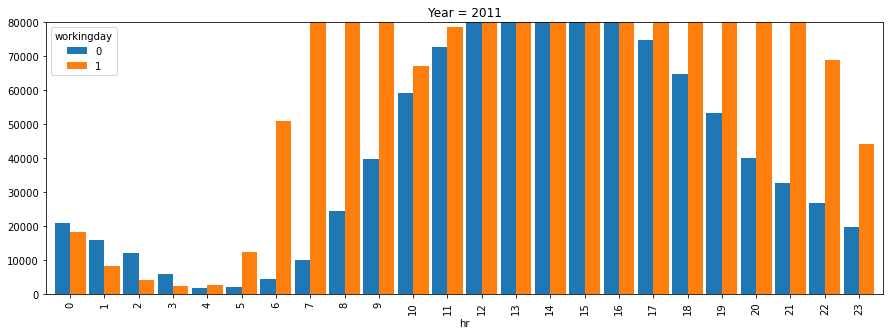

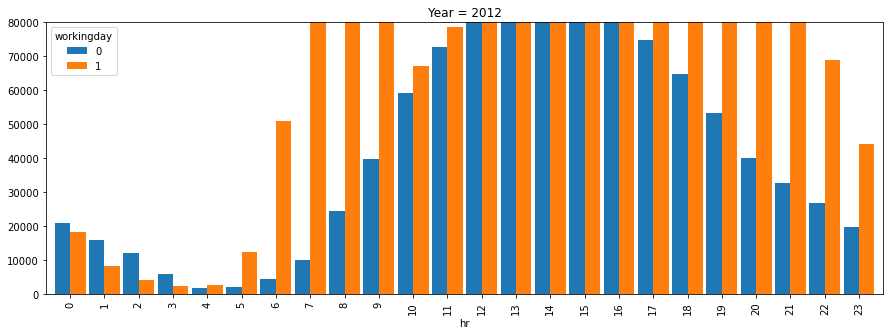

In [10]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    dd = data
    #if year: dd = dd[ dd.datetime.dt.year == year ]
    #dd.loc[:, ('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
    
    by_hour = dd.groupby(['hr', 'workingday'])['cnt'].agg(agg).unstack() # groupby hour and working day
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour


plot_by_hour(data, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(data, year=2012) # plotting the count plot based on hour for 2012

<AxesSubplot:title={'center':'Rent bikes per hour in 2011 and 2012'}, xlabel='hr'>

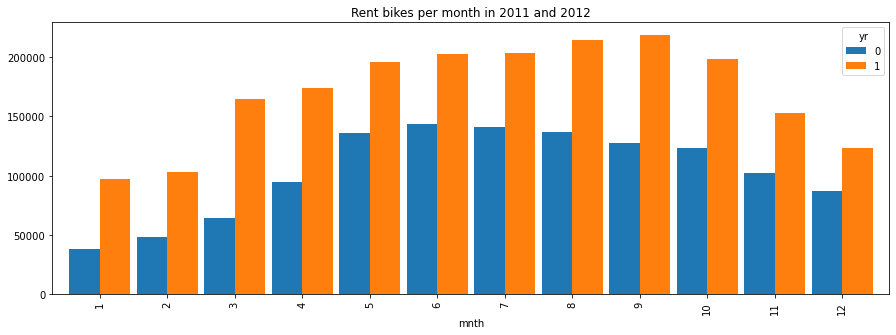

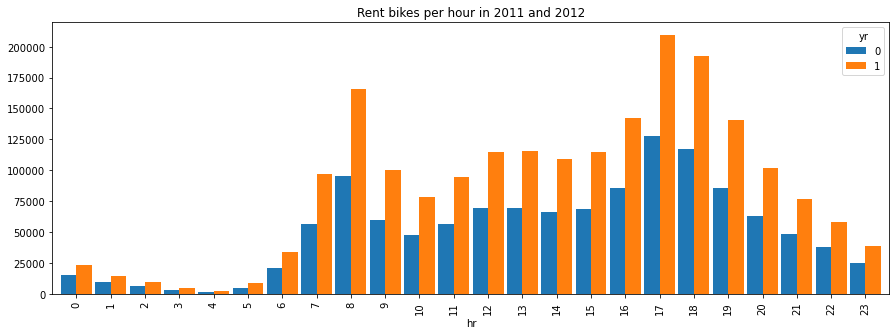

In [11]:
# method for creating the count plot based on year 
def plot_by_year(agg_attr, title):
    # extracting the required fields
    dd = data
    #dd['year'] = train.datetime.dt.year # extratcing the year
    #dd['month'] = train.datetime.dt.month # extratcing the month
    #dd['hour'] = train.datetime.dt.hour # extratcing the hour
    
    by_year = dd.groupby([agg_attr, 'yr'])['cnt'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by year


plot_by_year('mnth', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hr', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year

## Missing Value Analysis

In [12]:
data.isna().sum().sort_values(ascending=False)

cnt           0
weekday       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
workingday    0
registered    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
instant       0
dtype: int64

## Outlier Analysis 

## Box plots 

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

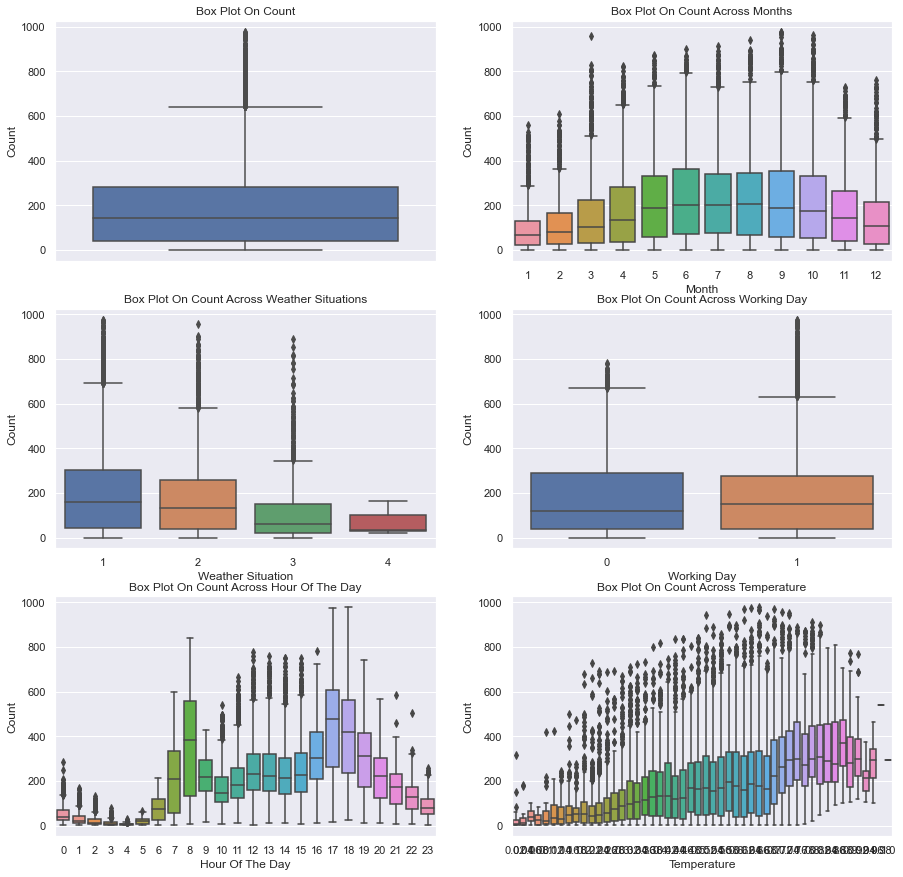

In [13]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=data,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=data,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=data,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

In [43]:
def draw_ridge_plot(data,catfield,numfield):
    # Initialize the FacetGrid object
    g = sns.FacetGrid(data, col=catfield,hue=catfield)

    # # Draw the densities in a few steps
    g.map(sns.kdeplot, numfield, shade=False)
    g.map(plt.axhline, y=0, lw=2)

    # # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, color=color, ha="left", va="center", transform=ax.transAxes)
    g.map(label, numfield)

    # Set the subplots to overlap
    # g.fig.subplots_adjust(hspace=-.25)

    # # Remove axes details that don't play well with overlap
    # g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

    g1 = sns.catplot(data=data,x=catfield,kind="box",y=numfield,col=catfield)
    g1.set(xticks=[])

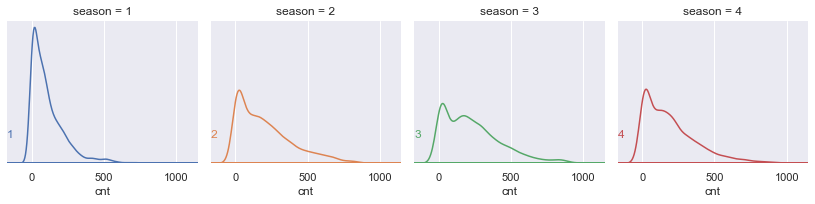

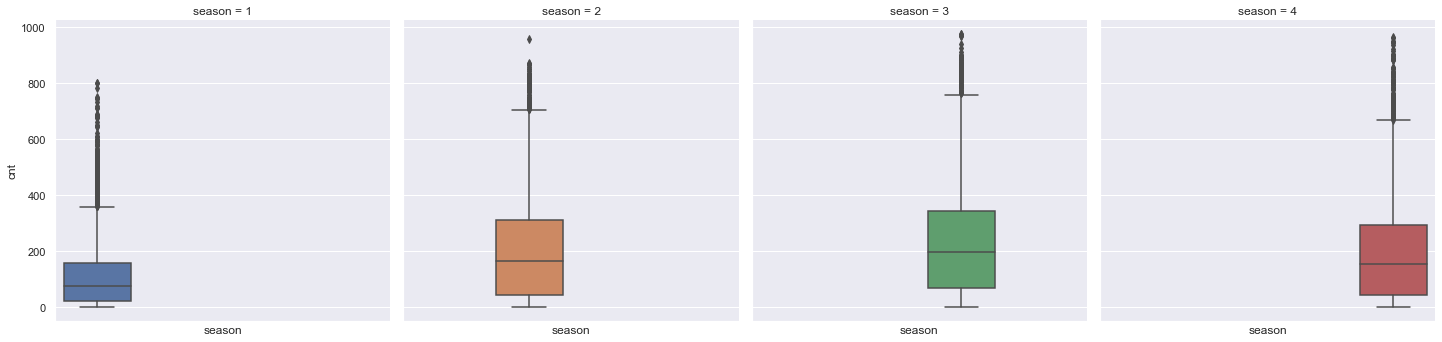

In [44]:
draw_ridge_plot(data,"season","cnt")

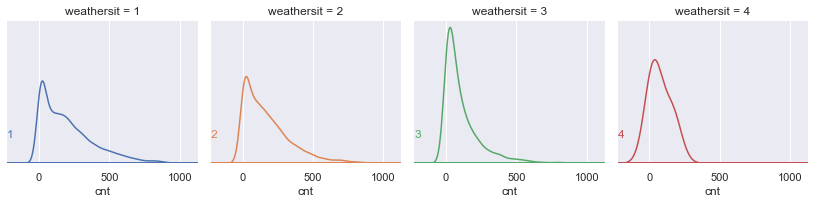

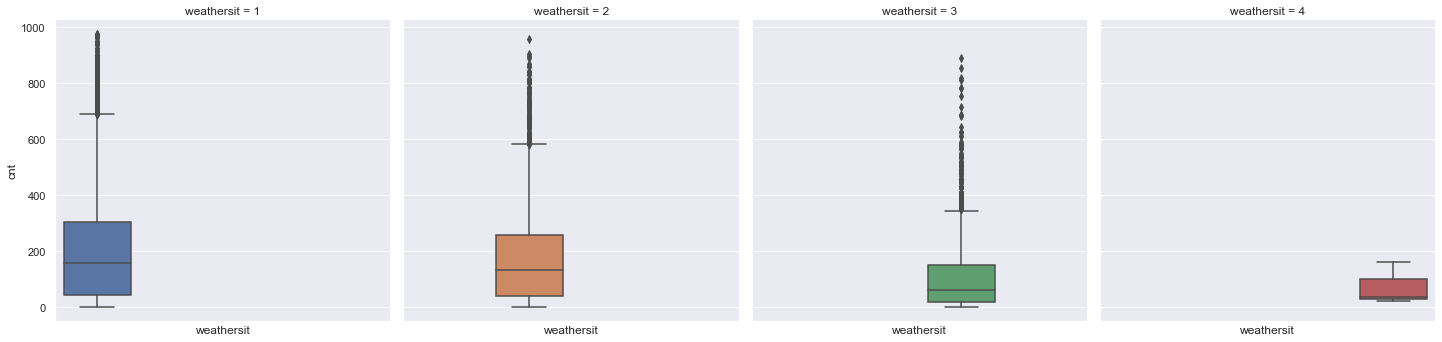

In [46]:
draw_ridge_plot(data,"weathersit","cnt")

## Remove outliers from data

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


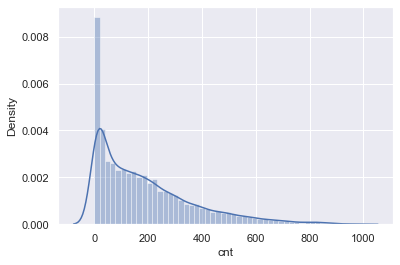

In [14]:
sns.distplot(data[target[-1]]);

Samples in train set with outliers: 17379
Samples in train set without outliers: 16874


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


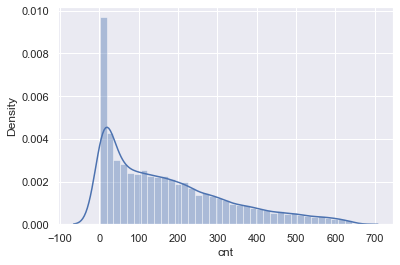

In [17]:
print("Samples in train set with outliers: {}".format(len(data)))
q1 = data.cnt.quantile(0.25)
q3 = data.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
train_preprocessed = data.loc[(data.cnt >= lower_bound) & (data.cnt <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(train_preprocessed)))
sns.distplot(train_preprocessed.cnt);

# Correlation Analysis

<AxesSubplot:>

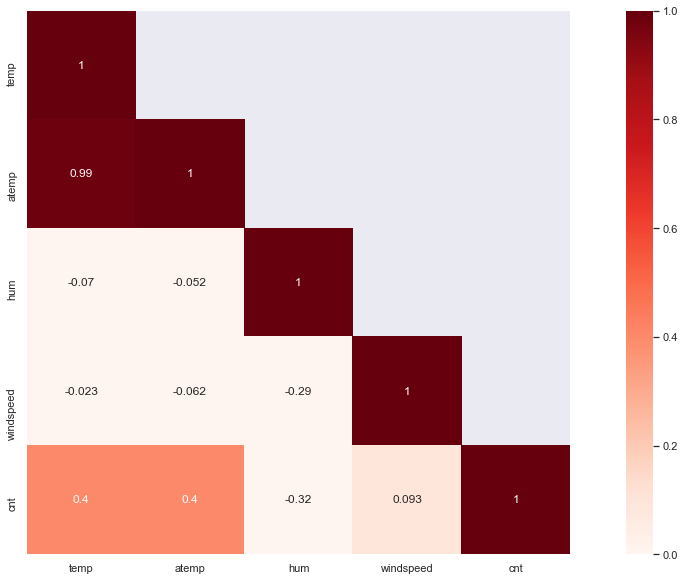

In [18]:
matrix = data[number_features + target].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

# Feature selection by finding correlation among independent variables(Crosscheck)

In [19]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(data, 0.8)
len(set(corr_features))

3

In [21]:
corr_features

{'atemp', 'cnt', 'yr'}

In [22]:
features.remove('atemp')

In [23]:
features

['season',
 'holiday',
 'mnth',
 'hr',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed']

# Overview metrics

### Mean Squared Error (MSE) 
### Mean Absolute Error (MAE)
### RMSE
### R squared

# Model Selection

In [24]:
x_train = train_preprocessed[features].values
y_train = train_preprocessed[target].values.ravel()
# Sort validation set for plots
val = val.sort_values(by=target)
x_val = val[features].values
y_val = val[target].values.ravel()
x_test = test[features].values

table = PrettyTable()
table.field_names = ["Model", "Mean Absolute Error" ,"Mean Squared Error", "R² score"]

models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor( random_state=0, n_estimators=300),
    GradientBoostingRegressor(random_state=0)
]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_val)

    mse = mean_squared_error(y_val, y_res)
    mae = mean_absolute_error(y_val, y_res)
    score = model.score(x_val, y_val)    

    table.add_row([type(model).__name__, format(mse, '.2f'), format(mae, '.2f'), format(score, '.2f')])

print(table)

+---------------------------+---------------------+--------------------+----------+
|           Model           | Mean Absolute Error | Mean Squared Error | R² score |
+---------------------------+---------------------+--------------------+----------+
|        SGDRegressor       |       41369.51      |       145.07       |   0.11   |
|           Lasso           |       35741.48      |       136.48       |   0.23   |
|         ElasticNet        |       44571.75      |       151.56       |   0.04   |
|           Ridge           |       35670.05      |       136.39       |   0.23   |
|            SVR            |       41581.06      |       141.76       |   0.10   |
|            SVR            |       28400.45      |       107.34       |   0.39   |
|      BaggingRegressor     |       5170.70       |       32.94        |   0.89   |
|      BaggingRegressor     |       34310.77      |       129.86       |   0.26   |
|           NuSVR           |       27506.76      |       110.56       |   0

In [26]:
type(train_preprocessed)

pandas.core.frame.DataFrame

In [27]:
train_preprocessed[features].values

array([[ 1.    ,  0.    ,  1.    , ...,  0.24  ,  0.81  ,  0.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.22  ,  0.8   ,  0.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.22  ,  0.8   ,  0.    ],
       ...,
       [ 1.    ,  0.    , 12.    , ...,  0.26  ,  0.6   ,  0.1642],
       [ 1.    ,  0.    , 12.    , ...,  0.26  ,  0.56  ,  0.1343],
       [ 1.    ,  0.    , 12.    , ...,  0.26  ,  0.65  ,  0.1343]])

In [28]:
train_preprocessed[target].values.ravel()

array([16, 40, 32, ..., 90, 61, 49], dtype=int64)

# Random Forest Model

In [29]:
# Table setup
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", "MAE", 'RMSLE', "R² score"]
# Model training
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    score = model.score(x, y)    
    rmsle = np.sqrt(mean_squared_log_error(y, pred))

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(mae, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])
    

evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')

print(table)

+-----------------------+------------+---------+-------+-------+----------+
|         Model         |  Dataset   |   MSE   |  MAE  | RMSLE | R² score |
+-----------------------+------------+---------+-------+-------+----------+
| RandomForestRegressor |  training  |  655.27 | 16.84 |  0.21 |   0.97   |
| RandomForestRegressor | validation | 4997.89 | 34.07 |  0.18 |   0.89   |
+-----------------------+------------+---------+-------+-------+----------+


In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
                        'max_features': max_features,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =iter, cv = 3, verbose=2, random_state=0, n_jobs=-1)

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
# Table setup
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", "MAE", 'RMSLE', "R² score"]
# Model training
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    score = model.score(x, y)    
    rmsle = np.sqrt(mean_squared_log_error(y, pred))

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(mae, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])
    

evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')

print(table)

+-----------------------+------------+---------+-------+-------+----------+
|         Model         |  Dataset   |   MSE   |  MAE  | RMSLE | R² score |
+-----------------------+------------+---------+-------+-------+----------+
| RandomForestRegressor |  training  |  461.93 | 14.14 |  0.18 |   0.98   |
| RandomForestRegressor | validation | 4851.13 | 31.60 |  0.16 |   0.90   |
+-----------------------+------------+---------+-------+-------+----------+


# Feature importance

In [38]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [39]:
# Print the feature ranking
print("Feature ranking:")

for f in range(x_val.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature hr (0.604612)
2. feature temp (0.154340)
3. feature hum (0.062903)
4. feature workingday (0.042834)
5. feature windspeed (0.033177)
6. feature mnth (0.025870)
7. feature season (0.024970)
8. feature weathersit (0.024464)
9. feature weekday (0.023550)
10. feature holiday (0.003279)


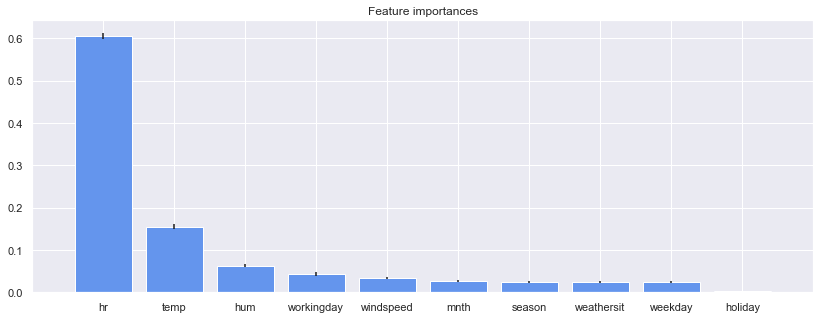

In [40]:
# Plot the feature importances of the forest
plt.figure(figsize=(14,5))
plt.title("Feature importances")
plt.bar(range(x_val.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_val.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_val.shape[1]])
plt.show()